   # Exploring Lotka-Volterra predator-prey equation behavior
   Your will use this exercise to answer the questions after the lecture.
   

In [98]:
library(phaseR)
library(deSolve)
library(tidyverse)
options(repr.plot.width=6, repr.plot.height=4)

As you remember from the lecture the Lotka-Volterra logistic equation is written as
$$\frac{dX}{dt} = a  X - b  X Y$$

$$\frac{dY}{dt} = c X Y - d Y $$

Where X is the prey and Y is the predator. We'll re-write it as an R function. Don't worry about its contents too much, but glancing at the code you should see that it accepts parameters as above (a, b, c and d) and computes the derivative.

In [3]:
predator_prey <- function(t, y, parameters) {
  # calculates dx/dt and dy/dt for a predator-prey model
  
  # t: time at which to evaluate derivatives
  # y: vector of system variables (c(X, Y))
  # parameters: vector of model parameters (c(a, b, c, d))
  
  # the arguments need to be named "t", "y", and "parameters", otherwise this won't work with phaseR, a package we will use later
    
  #now the state vector y has two elements because we have two species
  X <- y[1] # prey
  Y <- y[2] # predators
  
  a <- parameters['a']
  b <- parameters['b']
  c <- parameters['c']
  d <- parameters['d']
    
  # calculate rate of change
  dx <- a * X - b * Y * X
  dy <- c * X * Y - d * Y
  
  # return rate of change
  return(list(c(dx, dy)))
}

Now, well solve this function using the `ode` solver and plot the results using ggplot2

In [97]:
parameters <- c(a = 0.5, b = 0.6, c = 0.5, d = 0.5)
state <- c(X = .5, Y = .5)
times <- seq(0, 50, by = 0.01) # the timestep dt is chosen by setting the increment with 'by'

#?ode # look at the documentation to learn about the parameters
result <- as.data.frame(ode(y = state, times = times, func = predator_prey, parms = parameters))
head(result)

time,X,Y
<dbl>,<dbl>,<dbl>
0.00,0.5000000,0.5000000
0.01,0.5010029,0.4987528
0.02,0.5020115,0.4975112
0.03,0.5030259,0.4962753
0.04,0.5040461,0.4950449
0.05,0.5050721,0.4938201


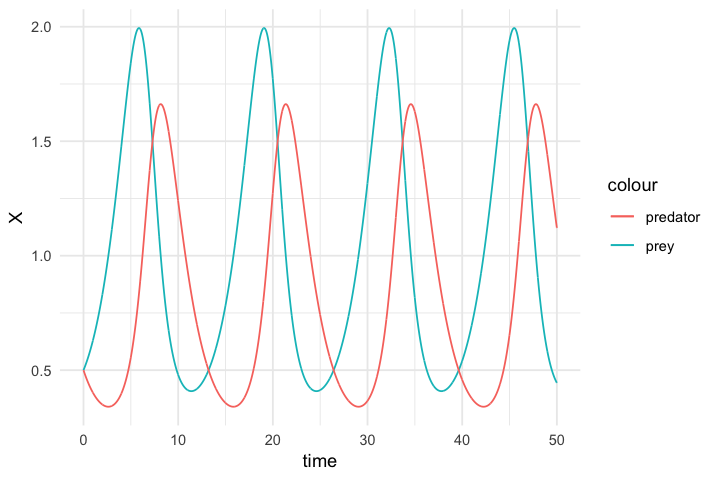

In [100]:
# note that we saved the output of the plot as a variable p for use later
(p = ggplot(result, aes(time, X, color = "prey")) + geom_line() + 
geom_line(aes(time, Y, color = "predator")) + theme_minimal()) 


## Dynamic plots of predators and prey

Using the `gganimate` libarary, we can make this plot animated, which makes it a bit easier to visualize

In [51]:
library(gganimate)

In [105]:
p + ylab("number of individuals") + transition_reveal(time) + anim_save('time.gif')

![](./time.gif)

We can also look at the the phase space of the 

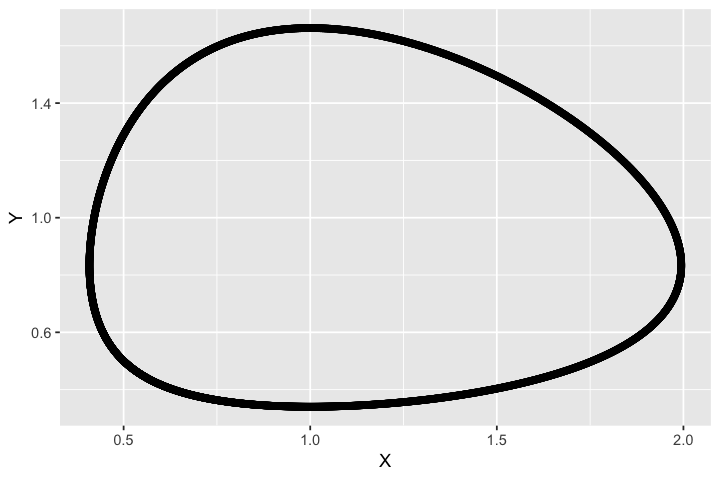

In [104]:
ggplot(result, aes(X, Y)) + geom_point() 